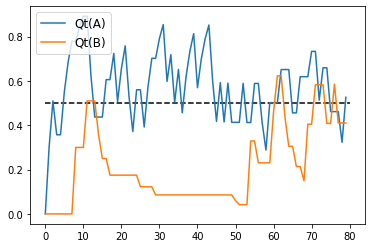

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import random

Npulls = 80#腕を引く回数

fig = plt.figure()

class Bandit:
    def __init__(self):
        """
        変数の初期化
        """
        self.Npulls = Npulls#
        self.p = [0.7, 0.3]# 腕を引いたときに報酬が得られる確率 [0本めの腕、1本めの腕]
        self.P_arm0 = np.zeros(self.Npulls)# 腕0を引く確率
        self.a = np.zeros(self.Npulls)# 時系列の行動のリスト
        self.R = np.zeros(self.Npulls)# 時系列の報酬のリスト
        self.Q = np.zeros((2, self.Npulls+1))# 時系列のQ値のリスト
        self.alpha = 0.3# Q学習の学習率
        self.beta = 2# softmaxの温度
        self.gamma = 1# 割引率
        
    def softmax(self, x):
        """
        softmax ポリシーで行動を選択
        """
        sigma = np.sum(np.exp(self.Q[:, x]*self.beta))
        vals = []
        for i in range(2):
            softmax = np.exp(self.Q[int(i), x]*self.beta)/sigma
            vals.append(random.uniform(0, softmax))
            if i==0:
                self.P_arm0[x] = softmax
        self.a[x] = np.argmax(vals)# 次に選択すると決めた腕
        
    def get_reward(self, x):
        """
        報酬を得る
        """
        if self.a[x] == 0:
            if random.random()<self.p[0]:
                self.R[x] = 1
        else:
            if random.random()<self.p[1]:
                self.R[x] = 1
    
    def update_Q(self, x):
        """
        Q値の更新
        """
        self.Q[int(self.a[x]), x+1] = self.Q[int(self.a[x]), x] + self.alpha*(self.R[i] - self.Q[int(self.a[x]), x])
        self.Q[1-int(self.a[x]), x+1]=self.Q[1-int(self.a[x]), x]

        
b = Bandit()
for i in range(Npulls):
    b.softmax(i)
    b.get_reward(i)
    b.update_Q(i)
        
    
x = range(Npulls)
y1 = b.Q[0][:-1]
y2 = b.Q[1][:-1]
plt.plot(x, y1, label="Qt(A)")
plt.plot(x, y2, label="Qt(B)")
plt.legend(loc="upper left", fontsize=12)
plt.hlines(0.5, 0, 80, linestyle="dashed")
plt.show()
